In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_to_ny_sales = 'datasets/nyc-rolling-sales.csv'
sales_df=pd.read_csv(path_to_ny_sales)
sales_df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
sales_df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [4]:
for col,dtype in zip(sales_df.columns,sales_df.dtypes):
    print(col,dtype)

Unnamed: 0 int64
BOROUGH int64
NEIGHBORHOOD object
BUILDING CLASS CATEGORY object
TAX CLASS AT PRESENT object
BLOCK int64
LOT int64
EASE-MENT object
BUILDING CLASS AT PRESENT object
ADDRESS object
APARTMENT NUMBER object
ZIP CODE int64
RESIDENTIAL UNITS int64
COMMERCIAL UNITS int64
TOTAL UNITS int64
LAND SQUARE FEET object
GROSS SQUARE FEET object
YEAR BUILT int64
TAX CLASS AT TIME OF SALE int64
BUILDING CLASS AT TIME OF SALE object
SALE PRICE object
SALE DATE object


In [8]:
print(any(sales_df['Unnamed: 0'].duplicated()))

True


In [9]:
multi_sale_units = sales_df[sales_df['Unnamed: 0'].duplicated() == True]

multi_sale_units


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18306,4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,,A1,4455 PARK AVENUE,...,1,0,1,1622,1587,1899,1,A1,140000,2017-05-12 00:00:00
18307,5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036,13,,A1,4348 PARK AVENUE,...,1,0,1,3525,1764,1899,1,A1,420000,2017-02-03 00:00:00
18308,6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,,A1,1948 BATHGATE AVENUE,...,1,0,1,2356,2047,1901,1,A1,127000,2017-08-22 00:00:00
18309,7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,273796,2016-09-21 00:00:00
18310,8,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,...,1,0,1,2329,1431,1901,1,A1,231244,2016-09-21 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [11]:
building_8413_records=sales_df[sales_df['Unnamed: 0'] == 8413]
building_8413_records

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8409,8413,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1338,1092,,R4,301 EAST 45TH STREET,...,1,0,1,-,-,1980,2,R4,965000,2017-06-16 00:00:00
33764,8413,3,CONEY ISLAND,02 TWO FAMILY DWELLINGS,1,7019,86,,B1,2811 WEST 20TH STREET,...,2,0,2,1000,1400,1901,1,B1,0,2016-10-05 00:00:00
57811,8413,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,4409,1011,,R4,136-16 31ST ROAD,...,1,0,1,-,-,2008,2,R4,559000,2016-10-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


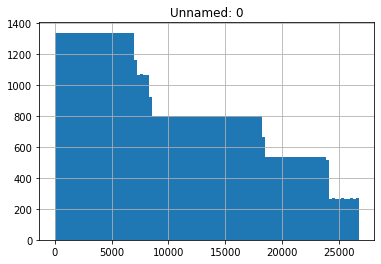

In [19]:
sales_df.hist(column=['Unnamed: 0'],bins=100)
plt.show()

In [21]:
sales_df.corrwith(sales_df['Unnamed: 0'])

Unnamed: 0                   1.000000
BOROUGH                      0.088817
BLOCK                        0.264130
LOT                         -0.031601
ZIP CODE                     0.166882
RESIDENTIAL UNITS           -0.013318
COMMERCIAL UNITS            -0.002821
TOTAL UNITS                 -0.012856
YEAR BUILT                  -0.004057
TAX CLASS AT TIME OF SALE    0.017395
dtype: float64

In [23]:
sales_df['SALE PRICE'].corr(sales_df['Unnamed: 0'])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [24]:
sales_df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [27]:
coerced_sales=pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')
only_non_numerics = sales_df['SALE PRICE'][coerced_sales.isna()]
only_non_numerics.unique()


array([' -  '], dtype=object)

In [28]:
sales_df['SALE PRICE'] = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].fillna(0)

In [29]:
sales_df['SALE PRICE'].corr(sales_df['Unnamed: 0'])

-0.015508752898042147

In [31]:
sales_df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [32]:
sales_df=sales_df.drop(columns=[
    'Unnamed: 0',
    'ADDRESS',          # Hard to parse. Block/zip/borough/neighborhood capture all the value we need. 
    'APARTMENT NUMBER', # Likely irrelevent to the price. Ought to be categorical, which would make data large.
    'SALE DATE',        # Everything was within a 12 month period, likely irrelevant and hard to parse.
    'LOT'               # A lot is a unique identifier within a block, and categorical. Not worth it. 
])
sales_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,28,3,31,4616,18690,1900,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,16,1,17,2212,7803,1900,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000.0


In [33]:
sales_df.describe()

,BOROUGH,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,1.056623e+06
std,1.289790,3568.263407,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,3.000000,3311.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,4.000000,6281.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [34]:

# Two other columns should be numeric, but are objects. Lets look at them too:
convert_to_numeric = [
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET'
]

for col in convert_to_numeric:
    coerced = pd.to_numeric(sales_df[col], errors='coerce')
    only_non_numerics = sales_df[col][coerced.isna()]

    # And this to print all the unique values from only_non_numerics
    print(col, only_non_numerics.unique())

LAND SQUARE FEET [' -  ']
GROSS SQUARE FEET [' -  ']


In [35]:
from sklearn.impute import SimpleImputer

# First lets just coerce the values to nan
for col in convert_to_numeric:
    coerced = pd.to_numeric(sales_df[col], errors='coerce')
    sales_df[col] = coerced
    sales_df[col] = sales_df[col].astype('float')
    
# Then, we can use the Imputer to fill in any missing values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 

# Only fit it on our two relevant columns, to save time
imputer.fit(sales_df[convert_to_numeric])
imputed_values = imputer.transform(sales_df[convert_to_numeric])

# Now replace our old Series with the new imputed values. 
sales_df['LAND SQUARE FEET'] = imputed_values[:, 0]
sales_df['GROSS SQUARE FEET'] = imputed_values[:, 1]

sales_df.describe()

,BOROUGH,BLOCK,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,8.454800e+04,84548.000000,84548.000000,8.454800e+04
mean,2.998758,4237.218976,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.056623e+06
std,1.289790,3568.263407,1290.879147,16.721037,8.713183,18.972584,3.486182e+04,2.874826e+04,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1322.750000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.348000e+03,1920.000000,1.000000,0.000000e+00
50%,3.000000,3311.000000,11209.000000,1.000000,0.000000,1.000000,3.200000e+03,2.520000e+03,1940.000000,2.000000,4.150000e+05
75%,4.000000,6281.000000,11357.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,1965.000000,2.000000,8.300000e+05
max,5.000000,16322.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


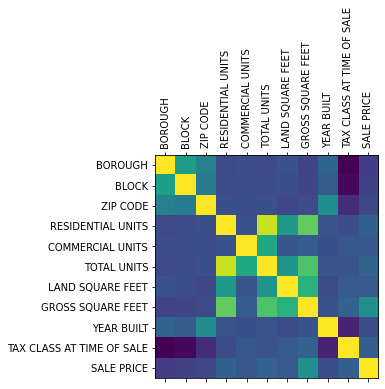

In [36]:

# One really cool and helpful thing we can do in pandas is checkout the correlation matrix:
correlation_matrix = sales_df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical');
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
plt.show()

In [39]:
# We can see that everything perfectly correlates with itself, obviously. 
# Some of this is still spurious, since for example ZIP CODE seems to correlate
# weakly with SALE PRICE But it's actually a categorical value, not a numeric one. 

# Lets inform pandas that these values ought to be considered categorical.
categorical_columns = [
    'BOROUGH',
    'BLOCK',
    'ZIP CODE',
    'TAX CLASS AT TIME OF SALE'
]

for c in categorical_columns:
    sales_df[c] = sales_df[c].astype('category')

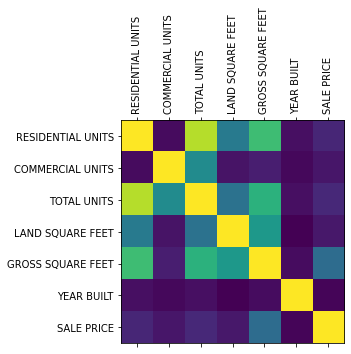

In [40]:

# Try the matrix again:
correlation_matrix = sales_df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical');
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
plt.show()

In [42]:
sales_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

In [43]:
sales_df['EASE-MENT'].unique()

array([' '], dtype=object)

RESIDENTIAL UNITS


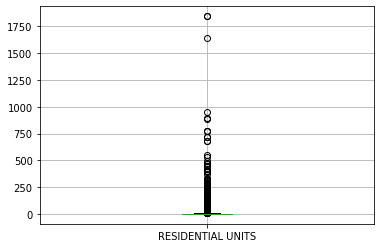

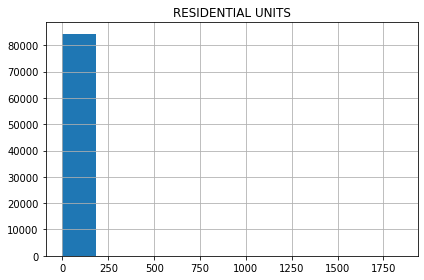

COMMERCIAL UNITS


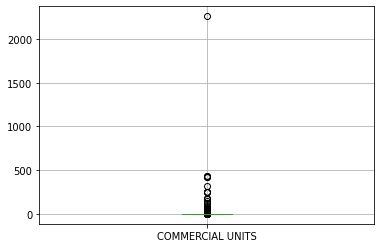

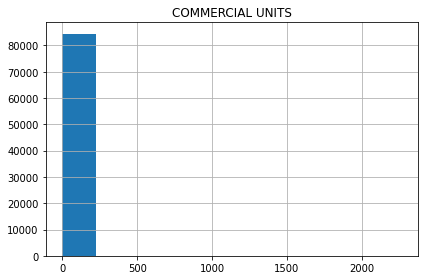

TOTAL UNITS


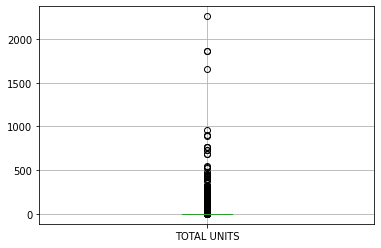

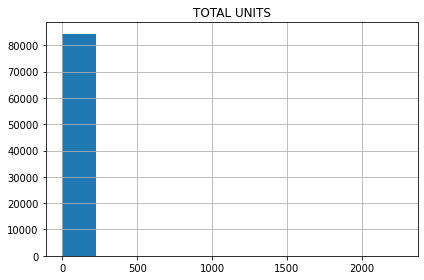

LAND SQUARE FEET


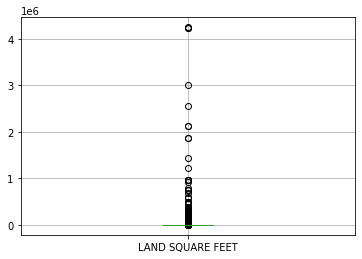

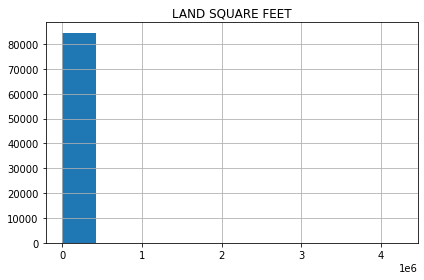

GROSS SQUARE FEET


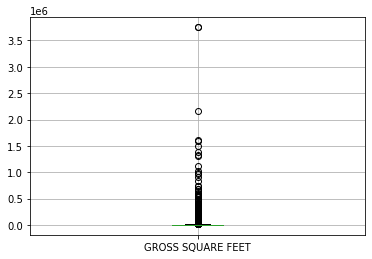

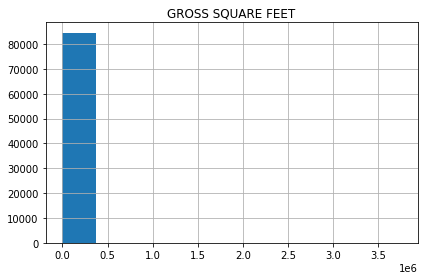

YEAR BUILT


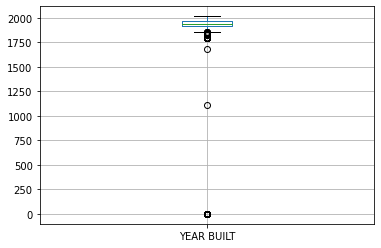

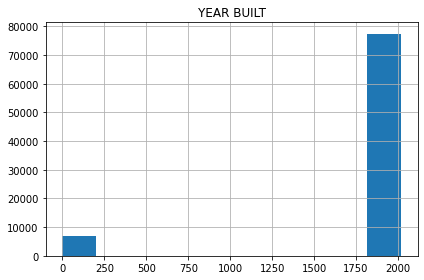

SALE PRICE


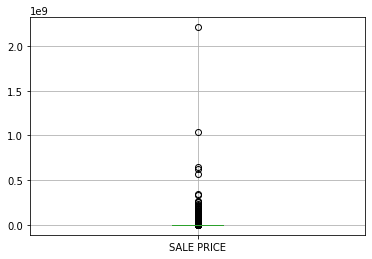

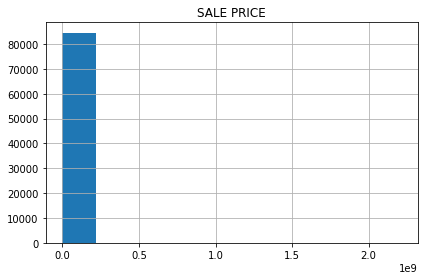

In [44]:

# Lets plot two interesting charts:
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    sales_df.boxplot(column=[col])
    sales_df.hist(column=[col])

    plt.tight_layout()
    plt.show()

RESIDENTIAL UNITS


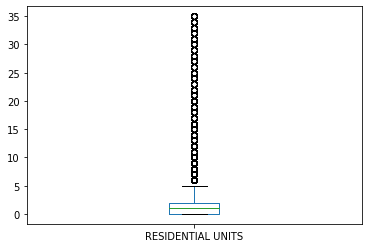

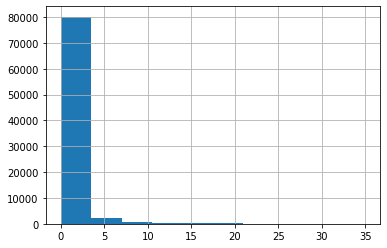

COMMERCIAL UNITS


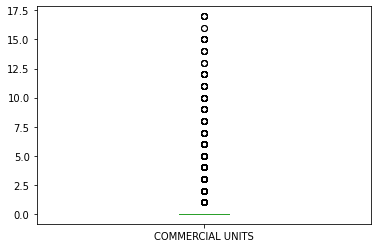

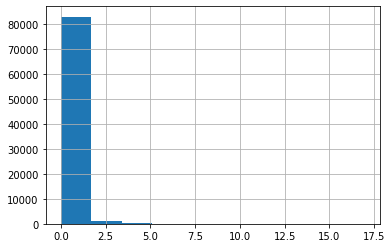

TOTAL UNITS


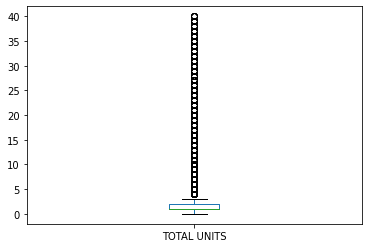

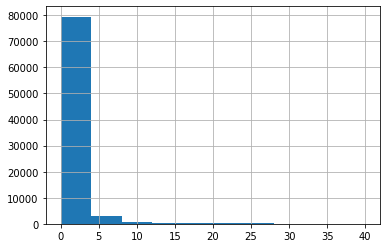

LAND SQUARE FEET


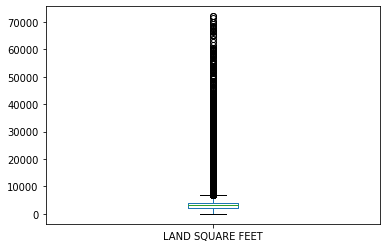

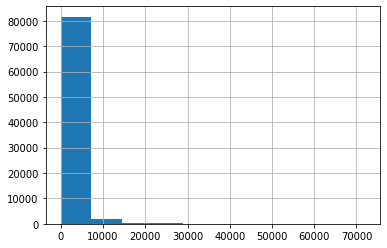

GROSS SQUARE FEET


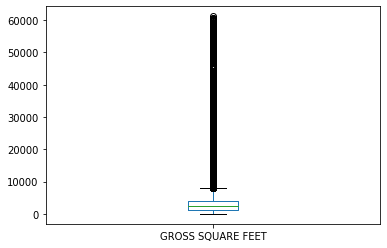

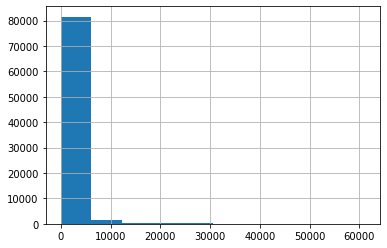

YEAR BUILT


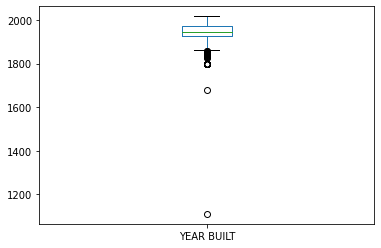

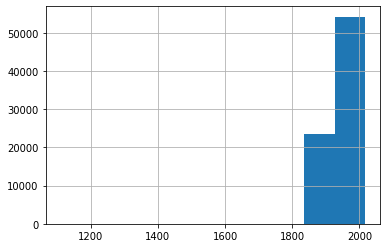

SALE PRICE


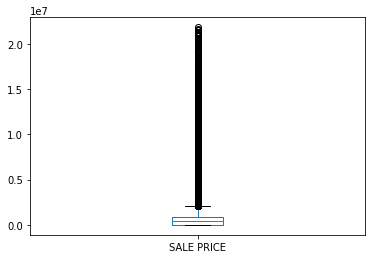

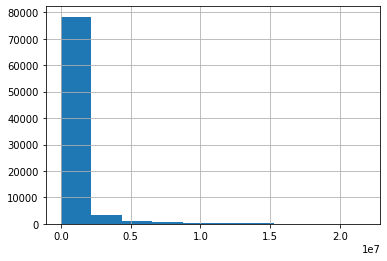

In [45]:

from scipy import stats
import numpy as np

# Lets plot two interesting charts:
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    
    # Quick and dirty outlier filtering, anything over 2 std deviations from the mean 
    # filtered out. 
    filtered_col = sales_df[col][np.abs(stats.zscore(sales_df[col])) < 2]
    
    filtered_col.plot.box()
    plt.show()
    
    filtered_col.hist(bins=10)
    plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Note that we are NOT going to scale "sale price" because
# ultimately that will be our target value. WE still need the
# label to be in the format we wish to predict. 
cols_to_scale = [
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'YEAR BUILT'
]

scaled_cols = scaler.fit_transform(sales_df[cols_to_scale])

# Wow, was it really that easy?
scaled_cols

array([[2.71149675e-03, 0.00000000e+00, 2.21141088e-03, 3.84025029e-04,
        1.71707463e-03, 9.41993059e-01],
       [1.51843818e-02, 1.32684653e-03, 1.37107475e-02, 1.08552329e-03,
        4.98324919e-03, 9.41993059e-01],
       [8.67678959e-03, 4.42282176e-04, 7.51879699e-03, 5.20185771e-04,
        2.08048654e-03, 9.41993059e-01],
       ...,
       [1.08459870e-03, 0.00000000e+00, 8.84564352e-04, 9.40661431e-04,
        3.98873236e-04, 9.54387705e-01],
       [0.00000000e+00, 3.09597523e-03, 3.09597523e-03, 4.89221549e-02,
        1.70952910e-02, 9.92067427e-01],
       [0.00000000e+00, 4.42282176e-04, 4.42282176e-04, 2.53884520e-03,
        6.39903588e-04, 9.94546356e-01]])

In [47]:

# So, we just got back an NDArray, and we need to put these
# columns back into a dataframe.
scaled_df = sales_df.copy(deep=True)

for i, col  in enumerate(cols_to_scale):
    scaled_df[col] = scaled_cols[:, i]

scaled_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,,C2,10009,0.002711,0.000000,0.002211,0.000384,0.001717,0.941993,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,0.015184,0.001327,0.013711,0.001086,0.004983,0.941993,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,0.008677,0.000442,0.007519,0.000520,0.002080,0.941993,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,,C4,10009,0.005423,0.000000,0.004423,0.000534,0.001811,0.948438,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,,C2,10009,0.003254,0.000000,0.002654,0.000557,0.001230,0.941993,2,C2,8000000.0


In [48]:
scaled_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,0.001098,0.000086,0.000995,0.000927,0.001079,0.887121,1.056623e+06
std,0.009068,0.003854,0.008391,0.008198,0.007665,0.266408,1.038794e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000442,0.000470,0.000359,0.951909,0.000000e+00
50%,0.000542,0.000000,0.000442,0.000753,0.000672,0.961824,4.150000e+05
75%,0.001085,0.000000,0.000885,0.000927,0.001079,0.974219,8.300000e+05
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.210000e+09


In [52]:
scaled_dummy_df=pd.get_dummies(scaled_df)
scaled_dummy_df.head(1)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,...,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
0,0.002711,0.0,0.002211,0.000384,0.001717,0.941993,6625000.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
x_train = scaled_dummy_df.drop(columns=['SALE PRICE'])
y_train = scaled_dummy_df['SALE PRICE']

x_train.head(1)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,...,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9
0,0.002711,0.0,0.002211,0.000384,0.001717,0.941993,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y_train.head(1)

0    6625000.0
Name: SALE PRICE, dtype: float64

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Sigmoid and other functions that squash the output might not be
# very appropriate for this task, because our target values are 
# quite large!
model.add(Dense(units=32, activation='relu', input_shape=(len(x_train.columns),)))

# For regression it's common to use a linear activation function
# since our output could be anything. In our case, it would never
# make sense to guess less than 0, so I'm using relu
model.add(Dense(units=1, activation='relu'))

# This function provides useful text data for our network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                397248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 397,281
Trainable params: 397,281
Non-trainable params: 0
_________________________________________________________________


In [58]:
# MSE is pretty common for regression tasks
model.compile(optimizer="adam", loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

MemoryError: Unable to allocate 6.26 GiB for an array with shape (67638, 12413) and data type float64